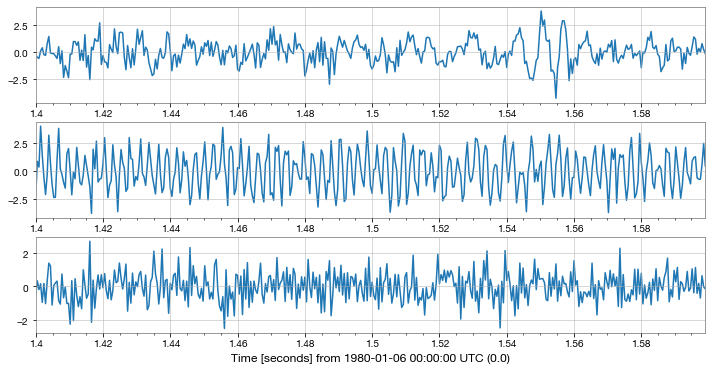

In [46]:
import numpy as np
from gwpy.timeseries import TimeSeries
from gwpy.plot import Plot

file = '00017d3cf3.npy'
path = f'../data/{file}'

signals = np.load(path)

sample_rate = 2**11

time_series0 = TimeSeries(signals[0, :], sample_rate=sample_rate, name= 'strain')
time_series1 = TimeSeries(signals[1, :], sample_rate=sample_rate, name= 'strain')
time_series2 = TimeSeries(signals[2, :], sample_rate=sample_rate, name= 'strain')

x0 = time_series0.x0
xunit = time_series0.xunit
xmin, xmax = x0+1.4*xunit, x0+1.6*xunit

strain0 = time_series0.whiten(highpass=16).crop(xmin, xmax)
strain1 = time_series1.whiten(highpass=16).crop(xmin, xmax)
strain2 = time_series2.whiten(highpass=16).crop(xmin, xmax)


plot = Plot(strain0, strain1, strain2, separate=True, sharex=True)

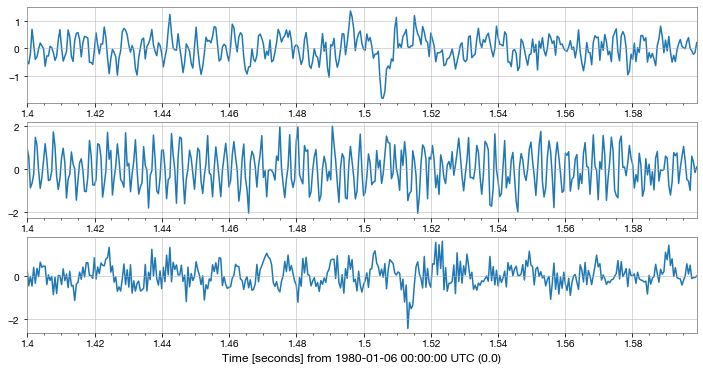

In [47]:
cross01 = strain0.correlate(strain1)
cross12 = strain1.correlate(strain2)
cross02 = strain0.correlate(strain2)


plot = Plot(cross01, cross12, cross02, separate=True, sharex=True)